In [96]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import matplotlib.cm as cm


rcParams['font.family'] = 'serif'

In [97]:
experiments_path = "Results"
baseline_path = "baseline/Results"

In [98]:
experiment_names = []
average_accuracies = []
majority_vote_accuracies = []
error_bars_accuracy = []
error_bars_majority_vote = []

In [99]:
for experiment in sorted(os.listdir(experiments_path)):
    experiment_path = os.path.join(experiments_path, experiment)
    if not os.path.isdir(experiment_path):
        continue

    accuracies = []
    majority_vote_accuracies_list = []

    results_path = os.path.join(experiment_path)
    for json_file in os.listdir(results_path):
        if json_file.endswith(".json"):
            json_file_path = os.path.join(results_path, json_file)
            with open(json_file_path, 'r') as file:
                data = json.load(file)
                
                if "accuracy" in data:
                    accuracies.append(data["accuracy"])
                if "majority_vote_accuracy" in data:
                    majority_vote_accuracies_list.append(data["majority_vote_accuracy"])

    
    if accuracies:
        mean_accuracy = np.mean(accuracies)
        std_accuracy = np.std(accuracies)
        n = len(accuracies)
        ci_accuracy = 1.96 * (std_accuracy / np.sqrt(n))
        average_accuracies.append(mean_accuracy)
        error_bars_accuracy.append([ci_accuracy])
    else:
        average_accuracies.append(0)
        error_bars_accuracy.append([0])

    
    if majority_vote_accuracies_list:
        mean_mv_accuracy = np.mean(majority_vote_accuracies_list)
        std_mv_accuracy = np.std(majority_vote_accuracies_list)
        n_mv = len(majority_vote_accuracies_list)
        ci_mv_accuracy = 1.96 * (std_mv_accuracy / np.sqrt(n_mv))
        majority_vote_accuracies.append(mean_mv_accuracy)
        error_bars_majority_vote.append([ci_mv_accuracy])
    else:
        majority_vote_accuracies.append(0)
        error_bars_majority_vote.append([0])

    experiment_names.append(experiment)

In [100]:
baseline_accuracies = []
baseline_majority_vote_accuracies = []
for json_file in os.listdir(baseline_path):
    if json_file.endswith(".json"):
        json_file_path = os.path.join(baseline_path, json_file)
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            
            if "accuracy" in data:
                baseline_accuracies.append(data["accuracy"])
            if "majority_vote_accuracy" in data:
                baseline_majority_vote_accuracies.append(data["majority_vote_accuracy"])

In [101]:
baseline_average_accuracy = np.mean(baseline_accuracies)
baseline_average_majority_vote_accuracy = np.mean(baseline_majority_vote_accuracies)

error_bars_accuracy = np.array(error_bars_accuracy).T  
error_bars_majority_vote = np.array(error_bars_majority_vote).T

In [102]:
# Fixing the indexes/order
desired_order = ["Names", "Numbers", "Names and Numbers", "NoOps", "Irrelevant Information"]
ordered_indices = [experiment_names.index(name) for name in desired_order]

error_bars_accuracy = error_bars_accuracy[0]
error_bars_majority_vote = error_bars_majority_vote[0]

experiment_names = [experiment_names[i] for i in ordered_indices]
average_accuracies = [average_accuracies[i] for i in ordered_indices]
majority_vote_accuracies = [majority_vote_accuracies[i] for i in ordered_indices]
error_bars_accuracy = [error_bars_accuracy[i] for i in ordered_indices]
error_bars_majority_vote = [error_bars_majority_vote[i] for i in ordered_indices]

## Figure 1 - All experiments (Sorted by Experiment number) 

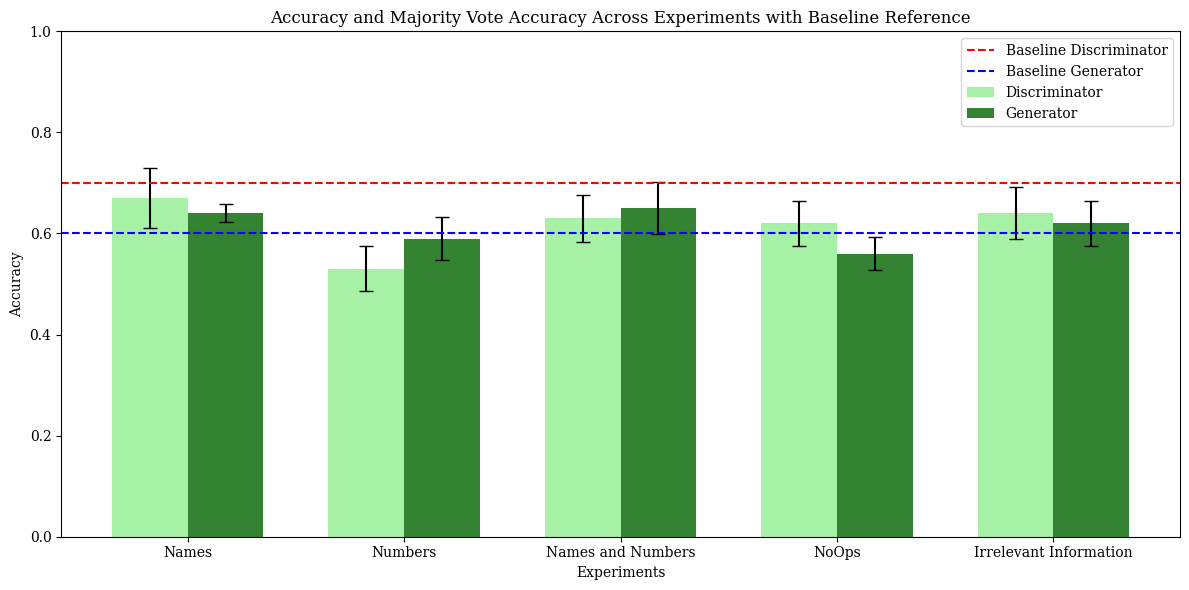

In [103]:
width = 0.35 
plt.figure(figsize=(12, 6))  
x_positions = np.arange(len(experiment_names))
plt.bar(x_positions - width/2, average_accuracies, width, yerr=error_bars_accuracy, 
        color='lightgreen', alpha=0.8, capsize=5, label='Discriminator')
plt.bar(x_positions + width/2, majority_vote_accuracies, width, yerr=error_bars_majority_vote, 
        color='darkgreen', alpha=0.8, capsize=5, label='Generator')
plt.axhline(y=baseline_average_accuracy, color='red', linestyle='--', linewidth=1.5, label='Baseline Discriminator')    
plt.axhline(y=baseline_average_majority_vote_accuracy, color='blue', linestyle='--', linewidth=1.5, label='Baseline Generator')
plt.xticks(x_positions, experiment_names, fontsize=10)
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Accuracy and Majority Vote Accuracy Across Experiments with Baseline Reference")
plt.ylim(0, 1)  
plt.legend()
plt.tight_layout()
plt.show()

## Figure 2 - All experiments  (Sorted by Bar Height and Colors from Combo 1)  

In [104]:
data = list(zip(
    experiment_names,
    average_accuracies,
    majority_vote_accuracies,
    error_bars_accuracy,
    error_bars_majority_vote
))

data_sorted = sorted(data, key=lambda x: x[1], reverse=False)


experiment_names, average_accuracies, majority_vote_accuracies, error_bars_accuracy, error_bars_majority_vote = zip(*data_sorted)


experiment_names = list(experiment_names)
average_accuracies = list(average_accuracies)
majority_vote_accuracies = list(majority_vote_accuracies)
error_bars_accuracy = list(error_bars_accuracy)
error_bars_majority_vote = list(error_bars_majority_vote)

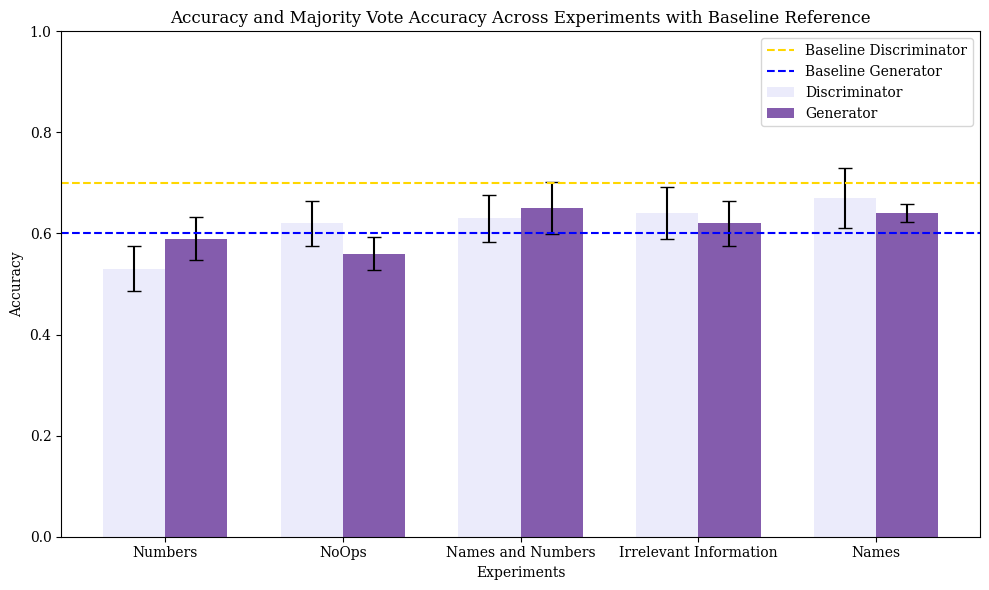

In [105]:
plt.figure(figsize=(10, 6))  
plt.bar(x_positions - width/2, average_accuracies, width, yerr=error_bars_accuracy, 
        color='lavender', alpha=0.8, capsize=5, label='Discriminator')
plt.bar(x_positions + width/2, majority_vote_accuracies, width, yerr=error_bars_majority_vote, 
        color='rebeccapurple', alpha=0.8, capsize=5, label='Generator')
plt.axhline(y=baseline_average_accuracy, color='gold', linestyle='--', linewidth=1.5, label='Baseline Discriminator')    
plt.axhline(y=baseline_average_majority_vote_accuracy, color='blue', linestyle='--', linewidth=1.5, label='Baseline Generator')
plt.xticks(x_positions, experiment_names, fontsize=10)
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Accuracy and Majority Vote Accuracy Across Experiments with Baseline Reference")
plt.ylim(0, 1)  
plt.legend()
plt.tight_layout()
plt.show()

## Figure 3 - All experiments (Sorted by Bar Height and Colors from Combo 2)  

In [106]:

color_pairs = [
    ("#B39DDB", "#673AB7"),  
    ("#81C784", "#388E3C"), 
    ("#64B5F6", "#1976D2"),  
    ("#FFF176", "#FBC02D"), 
    ("#E57373", "#D32F2F"), 
    ("#FFB74D", "#F57C00"), 
]


if len(color_pairs) < len(experiment_names):
    raise ValueError("Not enough color pairs for the number of experiments. Extend the color_pairs list.")


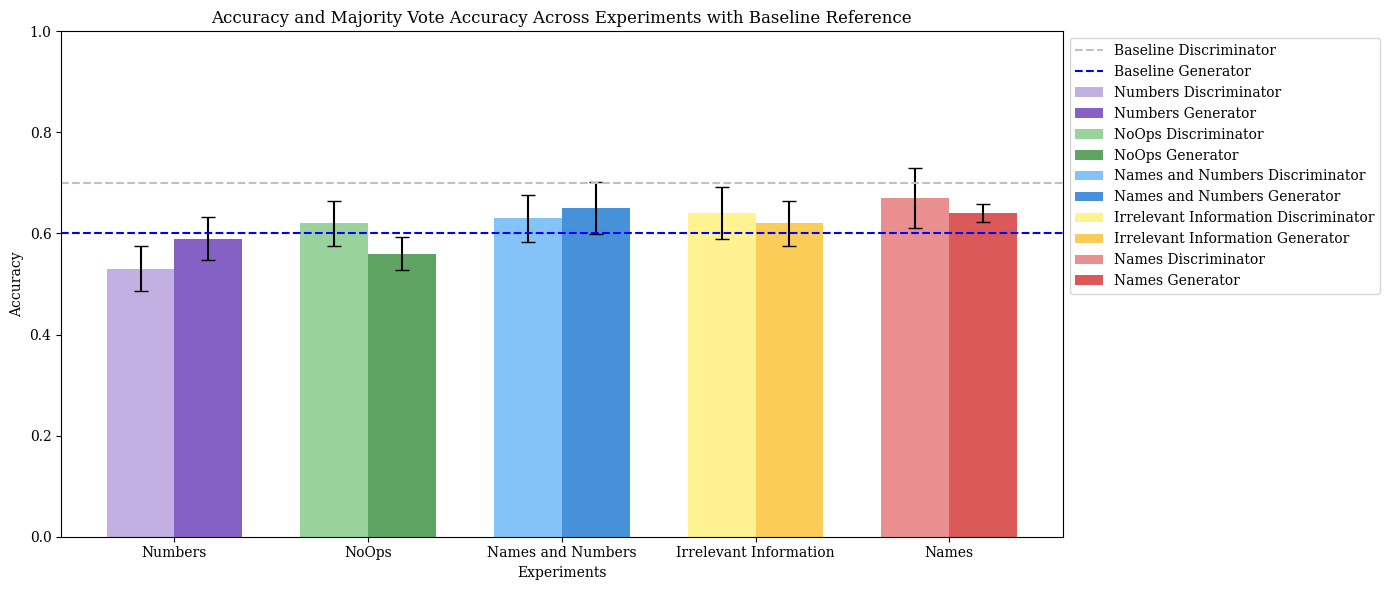

In [107]:
plt.figure(figsize=(14, 6)) 

for i, (pos, avg_acc, maj_vote_acc, error_acc, error_maj_vote) in enumerate(
    zip(x_positions, average_accuracies, majority_vote_accuracies, error_bars_accuracy, error_bars_majority_vote)
):
    light_color, dark_color = color_pairs[i] 

   
    plt.bar(pos - width/2, avg_acc, width, yerr=error_acc, 
            color=light_color, alpha=0.8, capsize=5, label=f'{experiment_names[i]} Discriminator')

    plt.bar(pos + width/2, maj_vote_acc, width, yerr=error_maj_vote, 
            color=dark_color, alpha=0.8, capsize=5, label=f'{experiment_names[i]} Generator')

plt.axhline(y=baseline_average_accuracy, color='silver', linestyle='--', linewidth=1.5, label='Baseline Discriminator')    
plt.axhline(y=baseline_average_majority_vote_accuracy, color='blue', linestyle='--', linewidth=1.5, label='Baseline Generator')
plt.xticks(x_positions, experiment_names, fontsize=10)
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Accuracy and Majority Vote Accuracy Across Experiments with Baseline Reference")
plt.ylim(0, 1)  
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  
plt.tight_layout()
plt.show()

## Figure 4 - Accuracy Drop $%$ 

In [108]:
experiment_names = []
accuracy_differences = []

for experiment in sorted(os.listdir(experiments_path)):
    experiment_path = os.path.join(experiments_path, experiment)
    if not os.path.isdir(experiment_path):
        continue

    accuracies = []

    results_path = os.path.join(experiment_path)
    for json_file in os.listdir(results_path):
        if json_file.endswith(".json"):
            json_file_path = os.path.join(results_path, json_file)
            with open(json_file_path, 'r') as file:
                data = json.load(file)

                if "accuracy" in data:
                    accuracies.append(data["accuracy"])

   
    if accuracies:
        average_accuracy = np.mean(accuracies)
        accuracy_difference = (average_accuracy - baseline_average_accuracy)*100
        accuracy_differences.append(accuracy_difference)
        experiment_names.append(experiment)  

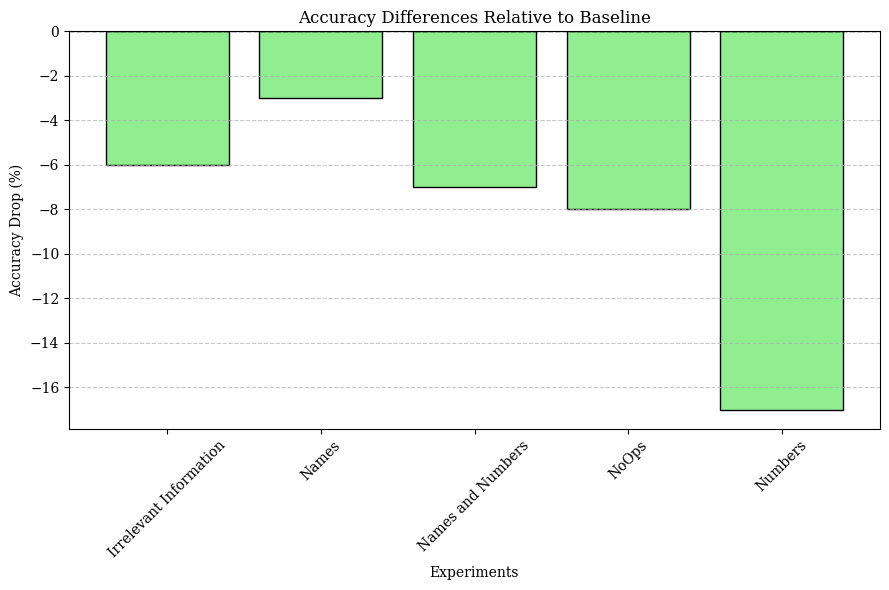

In [109]:

plt.figure(figsize=(9, 6))
plt.bar(experiment_names, accuracy_differences, color='lightgreen', edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Highlight zero difference
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Figure 5 - Accuracy Drop $%$ with Mistral

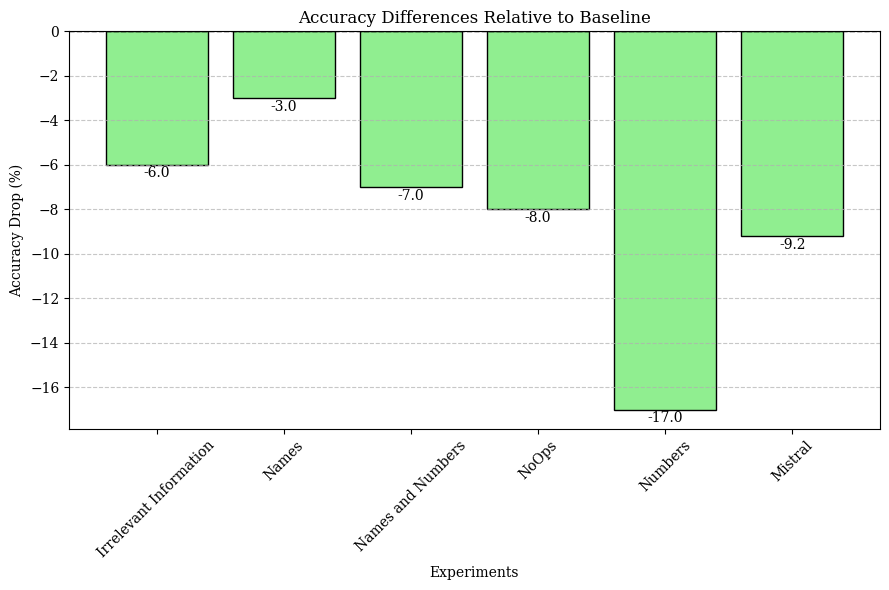

In [110]:
# Add Mistral manually
experiment_names.append("Mistral")
accuracy_differences.append(-9.2)  


plt.figure(figsize=(9, 6))
bars = plt.bar(experiment_names, accuracy_differences, color='lightgreen', edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, diff in zip(bars, accuracy_differences):
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val - 0.7 if y_val < 0 else y_val + 0.7,  
        f"{diff:.1f}",
        ha='center',
        va='bottom' if y_val < 0 else 'top',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## Figure 6 - Accuracy Drop $%$ with Mistral (Sorted by bar height)

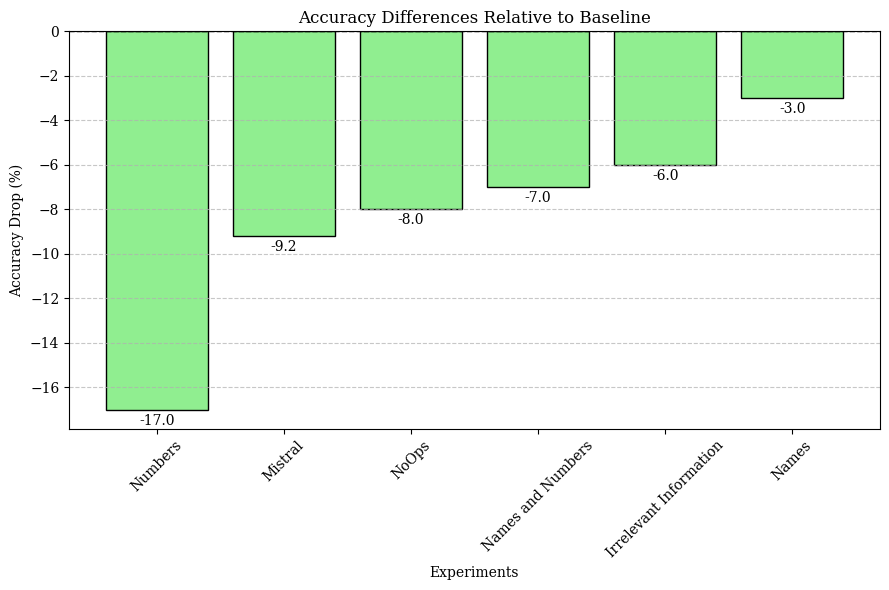

In [111]:

data = list(zip(experiment_names, accuracy_differences))


data_sorted = sorted(data, key=lambda x: x[1], reverse=False)  


experiment_names, accuracy_differences = zip(*data_sorted)


experiment_names = list(experiment_names)
accuracy_differences = list(accuracy_differences)


plt.figure(figsize=(9, 6))
bars = plt.bar(experiment_names, accuracy_differences, color='lightgreen', edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, diff in zip(bars, accuracy_differences):
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val - 0.8 if y_val < 0 else y_val + 0.8, 
        f"{diff:.1f}",
        ha='center',
        va='bottom' if y_val < 0 else 'top',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## Figure 7 - Accuracy Drop $%$ with Mistral (Sorted by bar height and color from combo 1)

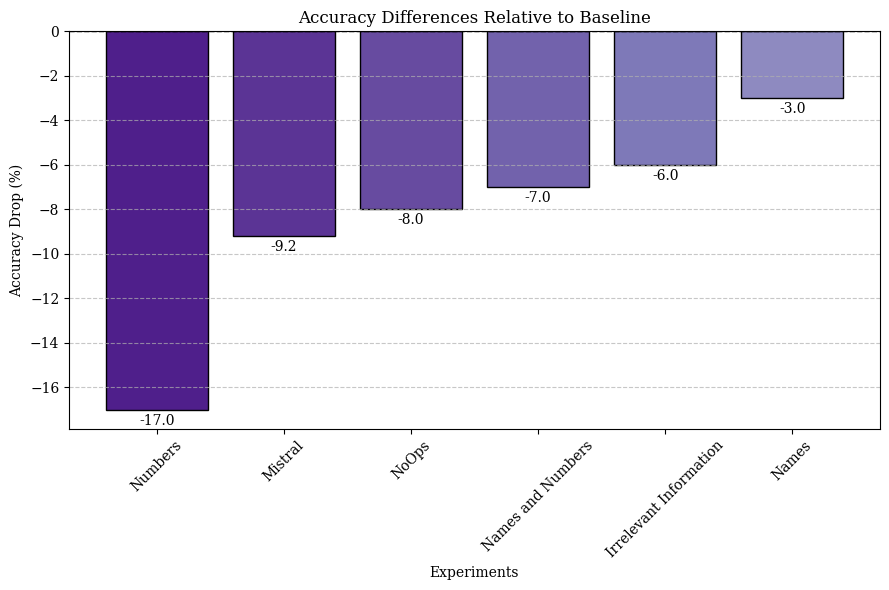

In [112]:
data = list(zip(experiment_names, accuracy_differences))


data_sorted = sorted(data, key=lambda x: x[1], reverse=False)  


experiment_names, accuracy_differences = zip(*data_sorted)


experiment_names = list(experiment_names)
accuracy_differences = list(accuracy_differences)


num_bars = len(experiment_names)
colors = [cm.Purples(0.9 - i * 0.4 / num_bars) for i in range(num_bars)]  


plt.figure(figsize=(9, 6))
bars = plt.bar(experiment_names, accuracy_differences, color=colors, edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1) 
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, diff in zip(bars, accuracy_differences):
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val - 0.8 if y_val < 0 else y_val + 0.8, 
        f"{diff:.1f}",
        ha='center',
        va='bottom' if y_val < 0 else 'top',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## Figure 8 - Accuracy Drop $%$ with Mistral (Sorted by bar height and color from combo 1)

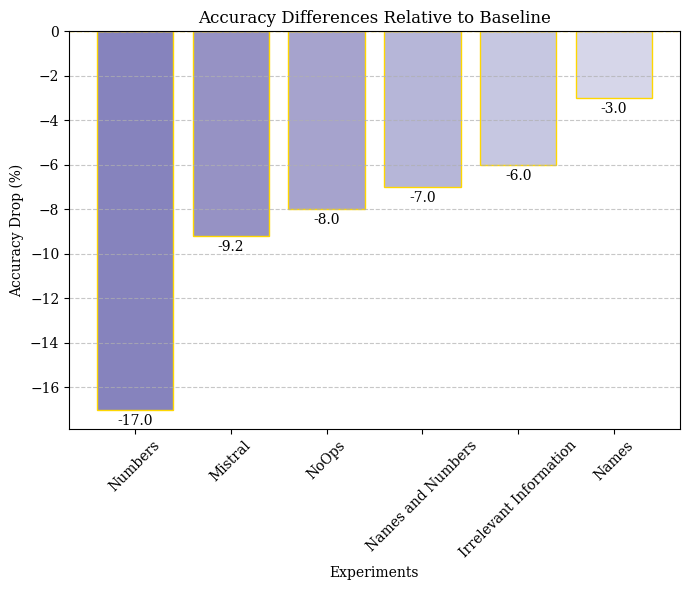

In [113]:
data = list(zip(experiment_names, accuracy_differences))


data_sorted = sorted(data, key=lambda x: x[1], reverse=False)  


experiment_names, accuracy_differences = zip(*data_sorted)


experiment_names = list(experiment_names)
accuracy_differences = list(accuracy_differences)


num_bars = len(experiment_names)
colors = [cm.Purples(0.6 - i * 0.4 / num_bars) for i in range(num_bars)]  


plt.figure(figsize=(7, 6))
bars = plt.bar(experiment_names, accuracy_differences, color=colors, edgecolor='gold')
plt.axhline(0, color='gold', linestyle='--', linewidth=1) 
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, diff in zip(bars, accuracy_differences):
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val - 0.8 if y_val < 0 else y_val + 0.8, 
        f"{diff:.1f}",
        ha='center',
        va='bottom' if y_val < 0 else 'top',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## Figure 9 - Accuracy Drop $%$ with Mistral (Sorted by bar height and color from combo 2)

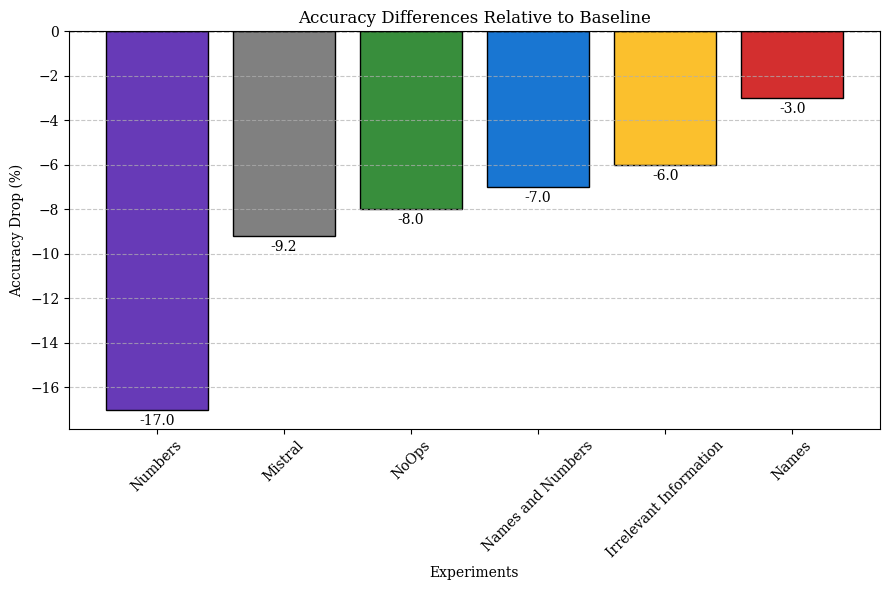

In [114]:

data = list(zip(experiment_names, accuracy_differences))


data_sorted = sorted(data, key=lambda x: x[1], reverse=False)  


experiment_names, accuracy_differences = zip(*data_sorted)


experiment_names = list(experiment_names)
accuracy_differences = list(accuracy_differences)


colors = {
    "Names": "#D32F2F", 
    "Numbers": "#673AB7", 
    "Names and Numbers": "#1976D2", 
    "NoOps": "#388E3C", 
    "Irrelevant Information": "#FBC02D",  
    "Mistral": "grey",  
}


bar_colors = [colors.get(name, "black") for name in experiment_names]  


plt.figure(figsize=(9, 6))
bars = plt.bar(experiment_names, accuracy_differences, color=bar_colors, edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1) 
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, diff in zip(bars, accuracy_differences):
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val - 0.8 if y_val < 0 else y_val + 0.8,  
        f"{diff:.1f}",
        ha='center',
        va='bottom' if y_val < 0 else 'top',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()